# The Dota 2 International 10 Traveller's Guide
## Capstone Project - The Battle of the Neighborhoods (Week 2)
### Applied Data Science Capstone by IBM/Coursera
    By: Franco Neil De Asis

## Table of contents
* [1. Introduction](#introduction)
* [2. Data](#data)
* [3. Methodology](#methodology)
* [4. Analysis](#analysis)
    - [4.1 Geographic Analysis](#geo_analysis)
        - [4.1.1 Hotels](#hotel_analysis_1)
        - [4.1.2 Food](#food_analysis_1)
        - [4.1.3 Pubs](#pub_analysis_1)
        - [4.1.4 Density Analysis](#density_analysis)
        - [4.1.5 4 Districts](#four_districts)
        - [4.1.6 Distance](#distance_analysis)
    - [4.2 Attribute Clustering](#param_clustering)
        - [4.2.1 Hotels](#hotel_analysis_2)
        - [4.2.2 Food](#food_analysis_2)
        - [4.2.3 Pubs](#pub_analysis_2)
        - [4.2.4 Aggregate Analysis](#agg_analysis)
    - [4.3 Payment Analysis](#payment_analysis)
* [5. Results and Discussion](#results)
* [6. Conclusion](#conclusion)
* [References](#references)

## 1. Introduction <a name="introduction"></a>

The International is the premier esports tournament for the video game Dota 2, hosted and produced by the game's developer, Valve. It is being held annually starting from 2011 upto the present. The event has been attended and watched by fans across the globe.

The first iteration of the International was on August 1, 2011 and was held on Gamescom in cologne. The tournament was born due to re-allocation of marketing funds. Instead of doing traditional marketing through advertising, Valve opted to do a tournament instead, boasting a 1 million USD grand prize. Since then the tournament was held every year with the last iteration being held in Shanghai, China.

The tournament boast the largest prize pool in all of esports, giving out a total of 34 million USD in prizes in 2019. The prizepool is a result of a crowdfunding scheme called the battle pass. 25% of the purchases made from the battle pass goes into the prizepool, in which the community was able to raise more than 30 million to add to the prizepool.[1]

The International consists of 18 teams which came from 6 major regions which include: North America, South America, Southeast Asia, China, Europe and CIS. It is a spectacle that has been watched by millions of people. In 2019, the total peak viewers(excluding China) amounted to 1,968,497 and has an average viewership of 726,754.
The venues that the tournament was held on has been consistently sold-out.[2]

The next iteration of the International will be held on the Ericsson Globe, Stockholm, Sweden. It has a seating capacity of 16,000 people which is expected to sellout.[3] However, on April 30, 2020, Valve announced that the event would be cancelled due to the current Covid-19 pandemic and is possible to return on 2021.[4]

### 1.1 Business Problem

There will be spectators around the world coming to Sweden for the International. 

#### How can their experience in Sweden as tourists and attendees improve during the International?

### 1.2 Solution

The solution would be by creating a traveller's guide that would help the spectators plan and prepare their iterenary during their stay in Sweden. It would leveraging data from Foursquare API to aquire information regarding Hotels, Food Venues and Pubs and processing that data so that it can be easily consumed by the spectators.

What's the value of improving the esport experience?

It has been projected that esports are going to grow at unprecedented levels. According to a Goldman Sachs report[5], the monthly audience would reach 276 million by 2022. The audience is mostly young and digitally inclined, where 79% are under 35 yrs. old. In Dota 2, the audience is predominantly young to middle aged adults, hence the inclusion of Pubs. The total esport prizepool is projected to 413 million in 2022 and Dota 2 boast the highest of them all in 2019.

Improving the experience of offline events would also improve the outlook of esports.

***

## 2. Data <a name="data"></a>

The data that is going to be used is a collection of Hotels, Food venues, and Pubs. The data is going to be acquired through Foursquare API. The data would be consisted of venues within the 10km range of the Ericsson Globe. There would be 3 primary datasets representing each venue category(hotel, food, pubs). The rationale for picking these specific category of venues because the target audience are sporting event spectators and not regular tourists. The International spans around 5-6 days of matches around 8 hours each day. Most of the time the spectator is inside the stadium and mostly only goes out to go back to their room or eat. The inclusion of hotels would help the audience plan where they are staying ahead of time since they would need to stay in Sweden for at least a week. The food venues would help them pick which venues they can eat. And pubs are for night meetups for the dota 2 community.

By covering these 3  major venues, the traveller's guide would be able to meet most the audience's travel needs.

Here is an example of the JSON file extracted:
![json sample](https://i.imgur.com/VUWrTjH.jpg)

After collecting the list of venues, I would run another set of queries to acquire details on the venue. The details include:
<table>
<thead>
<tr>
<th>Field</th>
<th>Description</th>
</tr>
</thead>
<tbody>
<tr>
<td>id</td>
<td>A unique string identifier for this venue.</td>
</tr>
<tr>
<td>name</td>
<td>The best known name for this venue.</td>
</tr>
<tr>
<td>contact</td>
<td>An object containing none, some, or all of <code class="language-text">twitter</code>, <code class="language-text">phone</code>, and <code class="language-text">formattedPhone</code>. All are strings.</td>
</tr>
<tr>
<td>location</td>
<td>An object containing none, some, or all of <code class="language-text">address</code> (street address), <code class="language-text">crossStreet</code>, <code class="language-text">city</code>, <code class="language-text">state</code>, <code class="language-text">postalCode</code>, <code class="language-text">country</code>, <code class="language-text">lat</code>, <code class="language-text">lng</code>, and <code class="language-text">distance</code>. All fields are strings, except for <code class="language-text">lat</code>, <code class="language-text">lng</code>, and <code class="language-text">distance</code>. Distance is measured in meters. Some venues have their locations intentionally hidden for privacy reasons (such as private residences). If this is the case, the parameter <code class="language-text">isFuzzed</code> will be set to true, and the <code class="language-text">lat</code>/<code class="language-text">lng</code> parameters will have reduced precision.</td>
</tr>
<tr>
<td>categories</td>
<td>An array, possibly empty, of <a href="/docs/resources/categories">categories</a> that have been applied to this venue. One of the categories will have a <code class="language-text">primary</code> field indicating that it is the primary category for the venue. For the complete category tree, see <a href="/docs/resources/categories">categories</a>.</td>
</tr>
<tr>
<td>verified</td>
<td>Boolean indicating whether the owner of this business has claimed it and verified the information.</td>
</tr>
<tr>
<td>stats</td>
<td>Contains <code class="language-text">checkinsCount</code> (total checkins ever here), <code class="language-text">usersCount</code> (total users who have ever checked in here), and <code class="language-text">tipCount</code> (number of tips here).</td>
</tr>
<tr>
<td>url</td>
<td>URL of the venue's website, typically provided by the venue manager.</td>
</tr>
<tr>
<td>hours</td>
<td>Contains the <a href="/docs/venues/hours">hours</a> during the week that the venue is open along with any named hours segments in a human-readable format. For machine readable hours see <a href="/docs/venues/hours">venues/hours</a></td>
</tr>
<tr>
<td>popular</td>
<td>Contains the <a href="/docs/venues/hours">hours</a> during the week when people usually go to the venue.</td>
</tr>
<tr>
<td>menu</td>
<td>An object containing <code class="language-text">url</code> and <code class="language-text">mobileUrl</code> that display the <a href="/docs/venues/menu">menu</a> information for this venue.</td>
</tr>
<tr>
<td>price</td>
<td>An object containing the price <code class="language-text">tier</code> from 1 (least pricey) - 4 (most pricey) and a <code class="language-text">message</code> describing the price tier.</td>
</tr>
<tr>
<td>rating</td>
<td>Numerical rating of the venue (0 through 10). Returned as part of an explore result, excluded in search results. Not all venues will have a rating.</td>
</tr>
<tr>
<td>hereNow</td>
<td>Information about who is here now. If present, there is always a <code class="language-text">count</code>, the number of people here. If viewing details and there is a logged-in user, there is also a <code class="language-text">groups</code> field with <code class="language-text">friends</code> and <code class="language-text">others</code> as <code class="language-text">type</code>s.</td>
</tr>
<tr>
<td>storeId</td>
<td>The manager's internal identifier for the venue.</td>
</tr>
<tr>
<td>description</td>
<td>Description of the venue provided by venue owner.</td>
</tr>
<tr>
<td>createdAt</td>
<td>Seconds since epoch when the venue was created.</td>
</tr>
<tr>
<td>mayor</td>
<td><code class="language-text">user</code> who is the mayor (absent if there is no mayor), and <code class="language-text">count</code>, the number of times they have checked in within the last 60 days.</td>
</tr>
<tr>
<td>tips</td>
<td>Contains the total <code class="language-text">count</code> of tips and <code class="language-text">groups</code> with <code class="language-text">friends</code> and <code class="language-text">others</code> as <code class="language-text">groupType</code>s. Groups may change over time.</td>
</tr>
<tr>
<td>listed</td>
<td>A grouped response of lists that contain this venue. Contains a <code class="language-text">summary</code> string representing the acting user's relationship to these lists. If an acting user is present, groups may include <code class="language-text">todos</code>, <code class="language-text">created</code>, <code class="language-text">edited</code>, <code class="language-text">followed</code>, <code class="language-text">friends</code>, and <code class="language-text">others</code>. If this venue is on the acting user's todo list, those items will be included in the <code class="language-text">todos</code> group.</td>
</tr>
<tr>
<td>beenHere</td>
<td>Contains <code class="language-text">count</code> of the number of times the acting user has been here. Absent if there is no acting user.</td>
</tr>
<tr>
<td>shortUrl</td>
<td>A short URL for this venue, e.g. <a href="http://4sq.com/Ab123D">http://4sq.com/Ab123D</a></td>
</tr>
<tr>
<td>canonicalUrl</td>
<td>The canonical URL for this venue, e.g. <a href="https://foursquare.com/v/foursquare-hq/4ab7e57cf964a5205f7b20e3">https://foursquare.com/v/foursquare-hq/4ab7e57cf964a5205f7b20e3</a></td>
</tr>
<tr>
<td>photos</td>
<td>A <code class="language-text">count</code> and <code class="language-text">groups</code> of <a href="/docs/venues/photos">photos</a> for this venue. Group types are <code class="language-text">checkin</code> and <code class="language-text">venue</code>. Not all items will be present.</td>
</tr>
<tr>
<td>likes</td>
<td>The <code class="language-text">count</code> of users who have liked this venue, and <code class="language-text">groups</code> containing any <code class="language-text">friends</code> and <code class="language-text">others</code> who have liked it. The groups included are subject to change.</td>
</tr>
<tr>
<td>like</td>
<td>Indicates if the current user has liked this venue.</td>
</tr>
<tr>
<td>dislike</td>
<td>Indicates if the current user has disliked this venue.</td>
</tr>
<tr>
<td>phrases</td>
<td>List of phrases commonly seen in this venue's tips, as well as a sample tip snippet and the number of tips this phrase appears in.</td>
</tr>
<tr>
<td>attributes</td>
<td>Attributes associated with the venue, such as price tier, whether the venue takes reservations, and parking availability.</td>
</tr>
<tr>
<td>roles</td>
<td>Present if and only if the current user has at least one assigned role for this venue. The value is a list of all of the current user's assigned roles for this venue. Possible values for each element of the list are <code class="language-text">manager</code> and <code class="language-text">employee</code>. Subject to change as additional roles may be defined.</td>
</tr>
<tr>
<td>page</td>
<td><code class="language-text">user</code> is the branded page associated with the venue. If the venue is part of a chain, this will be a user object referring to the chain. For venues that are being managed and not part of a chain, this will contain a user object that uniquely refers to this venue.</td>
</tr>
<tr>
<td>bestPhoto</td>
<td>Photo we have determined to be the best photo for the venue based on user upvotes and our internal algorithm.</td>
</tr>
</tbody>
</table>

All the details would be placed into its specific dataframe and then would be processed through clustering. Then, the results would be visualized through a map.

***

### 2.1 Downloading the Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

The data was downloaded from the **Foursquare api**. I have already collated the datasets from outside this notebook so that I won't have the need to call the foursquare api  and then collect the data again if I restarted the notebook.

The data involves 3 venues: Hotel, Food, Pubs. The data is collected via the venue explore. The range of data are the venues that are within **10km of the Ericsson Globe in Stockholm, Sweden**. After collecting the list of venues, foursquare api was called again to collect the details of the venues that would include parameters such as likes, tip count, and rating.

The datasets were saved via csv file and uploaded to my github.

The code below downloads the data.

In [2]:
# !wget -q -O 'food_data_details.csv' https://raw.githubusercontent.com/sphinxkid/Coursera_Capstone/master/datasets/food_data_details.csv
# !wget -q -O 'hotel_data_details.csv' https://raw.githubusercontent.com/sphinxkid/Coursera_Capstone/master/datasets/hotel_data_details.csv
# !wget -q -O 'pub_data_details.csv' https://raw.githubusercontent.com/sphinxkid/Coursera_Capstone/master/datasets/pub_data_details.csv
# print('Data Downloaded')

Opening and Peeking at the Food Dataset:

In [3]:
with open('food_data_details.csv') as food_data:
    food_df = pd.read_csv(food_data)
food_df.head()

,Unnamed: 0,Unnamed: 0.1,venue_id,name,lat,lng,address,distance,postal_code,cc,...,category,tip_count,likes,rating,price_tier,reservations,diningOptions,payments,outdoorSeating,serves
0,0,0,5487515a498e90fa40846448,Enskedeparkens bageri,59.288972,18.063301,Enskede gÃ¥rdsvÃ¤g 19,1263,NaN,SE,...,Bakery,13.0,57.0,9.1,1.0,No,No Delivery,Credit Cards: Yes,Yes,"Brunch, Lunch,"
1,1,1,4adcdaedf964a5206a5a21e3,Reggev Hummus,59.308876,18.081884,RingvÃ¤gen 145,1703,NaN,SE,...,Middle Eastern Restaurant,61.0,205.0,9.3,1.0,No,Delivery,Credit Cards: Yes (incl. Visa & MasterCard),Yes,"Brunch, Lunch, Dinner,"
2,2,2,51c9f88c498ebdb43d197011,Bonne Femme,59.294291,18.109586,MalmÃ¶vÃ¤gen 18,1479,NaN,SE,...,Bakery,3.0,32.0,8.9,1.0,No,No Delivery,NaN,Yes,NaN
3,3,3,4c6822049cedd13a2bbd79a1,Gamla Enskede Matbod,59.285033,18.087573,StockholmsvÃ¤gen 117,980,NaN,SE,...,Scandinavian Restaurant,6.0,22.0,8.6,2.0,Yes,No Delivery,Credit Cards: Yes,Yes,NaN
4,4,4,52ee35b8498e6f60f06c5ec4,TvÃ¥ SmÃ¥ Svin,59.296702,18.051829,Ã…rstavÃ¤gen 49,1838,NaN,SE,...,Scandinavian Restaurant,12.0,43.0,8.9,2.0,Yes,No Delivery,Credit Cards: Yes,Yes,"Brunch, Lunch, Dinner,"


Opening and Peeking at the Hotel Dataset:

In [4]:
with open('hotel_data_details.csv') as hotel_data:
    hotel_df = pd.read_csv(hotel_data)
hotel_df.head()

,Unnamed: 0,Unnamed: 0.1,venue_id,name,lat,lng,address,distance,postal_code,cc,...,category,tip_count,likes,rating,price_tier,reservations,diningOptions,payments,outdoorSeating,serves
0,0,0,5364e8a7498e241e281a4333,Motel L,59.302881,18.087713,Hammarby AllÃ© 41,1059,NaN,SE,...,Hotel,30.0,125.0,8.3,NaN,Yes,NaN,Credit Cards: Yes,NaN,Breakfast
1,1,1,4adcdae8f964a520555921e3,Hotel Rival,59.318167,18.063311,Mariatorget 3,2967,NaN,SE,...,Hotel,42.0,165.0,8.8,NaN,NaN,NaN,Credit Cards: Yes (incl. American Express & Ma...,NaN,NaN
2,2,2,4bc366b4f8219c744d09b610,Elite Hotel Marina Tower,59.314703,18.109398,SaltsjÃ¶qvarns Kaj 25,2769,NaN,SE,...,Hotel,27.0,87.0,8.7,NaN,Yes,NaN,Credit Cards: Yes (incl. American Express),NaN,NaN
3,3,3,4afeef9df964a520e43122e3,Hotel Skeppsholmen,59.324751,18.087659,GrÃ¶na GÃ¥ngen 1,3475,NaN,SE,...,Hotel,36.0,123.0,8.7,NaN,NaN,NaN,Credit Cards: Yes,NaN,NaN
4,4,4,4adcdae8f964a520395921e3,Grand HÃ´tel Stockholm,59.329364,18.075392,SÃ¶dra Blasieholmshamnen 8,4008,NaN,SE,...,Hotel,59.0,335.0,8.7,NaN,Yes,NaN,Credit Cards: Yes (incl. American Express & Ma...,Yes,"Breakfast, Brunch, Lunch, Dinner, Dessert,"


Opening and Peeking at the Pub Dataset:

In [5]:
with open('pub_data_details.csv') as pub_data:
    pub_df = pd.read_csv(pub_data)
pub_df.head()

,Unnamed: 0,Unnamed: 0.1,venue_id,name,lat,lng,address,distance,postal_code,cc,...,category,tip_count,likes,rating,price_tier,reservations,diningOptions,payments,outdoorSeating,serves
0,0,0,4c49b0669f2ad13ae72ba353,Oliver Twist,59.318282,18.070002,Repslagargatan 6,2854,NaN,SE,...,Pub,92.0,267.0,8.5,1.0,Yes,NaN,Credit Cards: Yes,Yes,"Brunch, Lunch, Dinner,"
1,1,1,4adcdaebf964a520ae5921e3,WirstrÃ¶ms Pub,59.324897,18.068192,Stora Nygatan 13,3592,NaN,SE,...,Pub,59.0,194.0,8.5,2.0,Yes,No Delivery,Credit Cards: Yes,Yes,"Lunch, Dinner, Dessert,"
2,2,2,4adcdaebf964a520cf5921e3,Akkurat,59.319809,18.068830,Hornsgatan 18,3035,NaN,SE,...,Pub,185.0,580.0,9.0,2.0,Yes,Delivery,Credit Cards: Yes (incl. American Express),Yes,Dinner
3,3,3,4adcdaecf964a520175a21e3,Soldaten Å vejk,59.314420,18.076377,Ã–stgÃ¶tagatan 35,2353,NaN,SE,...,Pub,53.0,186.0,9.0,NaN,No,"Bar Service, Delivery,",Credit Cards: Yes (incl. American Express),Yes,"Dinner, Dessert, Happy Hour,"
4,4,4,4b194789f964a52064da23e3,The Bishops Arms,59.320126,18.064732,Bellmansgatan 12,3141,NaN,SE,...,Pub,34.0,92.0,8.1,1.0,Yes,NaN,Credit Cards: Yes (incl. Visa & MasterCard),Yes,Dinner


### 2.2 Processing and Exploring the Hotel Data

The unnecessary columns: 'Unnamed: 0' and 'Unnamed: 0.1' is dropped. The 'postal_code' column is also dropped because of an error in processing it in data collection, resulting to an entire column of NaN.

In [6]:
hotel_df = hotel_df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'postal_code'])
hotel_df.head()

,venue_id,name,lat,lng,address,distance,cc,city,state,country,category,tip_count,likes,rating,price_tier,reservations,diningOptions,payments,outdoorSeating,serves
0,5364e8a7498e241e281a4333,Motel L,59.302881,18.087713,Hammarby AllÃ© 41,1059,SE,Stockholm,Storstockholm,Sverige,Hotel,30.0,125.0,8.3,NaN,Yes,NaN,Credit Cards: Yes,NaN,Breakfast
1,4adcdae8f964a520555921e3,Hotel Rival,59.318167,18.063311,Mariatorget 3,2967,SE,Stockholm,Storstockholm,Sverige,Hotel,42.0,165.0,8.8,NaN,NaN,NaN,Credit Cards: Yes (incl. American Express & Ma...,NaN,NaN
2,4bc366b4f8219c744d09b610,Elite Hotel Marina Tower,59.314703,18.109398,SaltsjÃ¶qvarns Kaj 25,2769,SE,Stockholm,Storstockholm,Sverige,Hotel,27.0,87.0,8.7,NaN,Yes,NaN,Credit Cards: Yes (incl. American Express),NaN,NaN
3,4afeef9df964a520e43122e3,Hotel Skeppsholmen,59.324751,18.087659,GrÃ¶na GÃ¥ngen 1,3475,SE,Stockholm,Storstockholm,Sverige,Hotel,36.0,123.0,8.7,NaN,NaN,NaN,Credit Cards: Yes,NaN,NaN
4,4adcdae8f964a520395921e3,Grand HÃ´tel Stockholm,59.329364,18.075392,SÃ¶dra Blasieholmshamnen 8,4008,SE,Stockholm,Storstockholm,Sverige,Hotel,59.0,335.0,8.7,NaN,Yes,NaN,Credit Cards: Yes (incl. American Express & Ma...,Yes,"Breakfast, Brunch, Lunch, Dinner, Dessert,"


The describe method is being used to preview the values on the dataset. The hotel dataset previewed that certain columns are missing real values, which are rating: 156/186 and price_tier: 14/186.

In [7]:
hotel_df.describe()

,lat,lng,distance,tip_count,likes,rating,price_tier
count,186.000000,186.000000,186.000000,186.000000,186.000000,156.000000,14.000000
mean,59.329393,18.058643,4800.392473,15.650538,45.731183,6.914744,2.357143
std,0.017662,0.037484,1791.723365,17.441219,66.057819,1.121451,0.841897
min,59.239821,17.922580,115.000000,0.000000,0.000000,4.600000,1.000000
25%,59.321941,18.046683,3578.500000,4.000000,7.000000,6.100000,2.000000
50%,59.332208,18.060074,4641.500000,10.500000,20.000000,7.000000,3.000000
75%,59.338103,18.075013,5512.250000,20.750000,56.750000,7.800000,3.000000
max,59.372109,18.213412,9866.000000,89.000000,354.000000,9.200000,3.000000


A histogram graph is used to view the distribution of certain parameters.

These graphs show that majority of the *distance* values are in the middel of 3000-6000 meters. The amount of venues that have *likes* less than 50 numbers the most. The *rating* is generally evenly distributed. The *price_tier* shows that most hotels are at the upper range in pricing however our data only has 14 values.

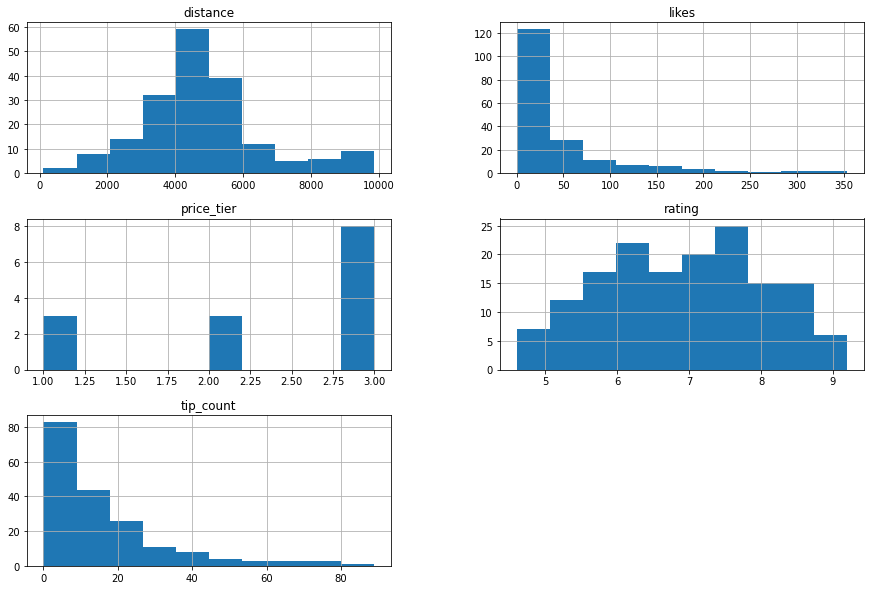

In [8]:
hist = hotel_df.hist(column=['distance', 'likes', 'price_tier', 'rating', 'tip_count'],bins=10, figsize=(15,10))

Then we drop the rows that has a null value on the rating column because this parameter is going to be used for clustering later on.

In [9]:
hotel_df_2 = hotel_df.dropna(subset=['rating'])
hotel_df_2.reset_index(inplace=True)
hotel_df_2.tail(5)

,index,venue_id,name,lat,lng,address,distance,cc,city,state,...,category,tip_count,likes,rating,price_tier,reservations,diningOptions,payments,outdoorSeating,serves
151,180,4ce4eee7637c6ea8d90a5b42,City Lodge,59.333253,18.058928,Klara norra kyrkogata 15,4631,SE,Stockholm,Storstockholm,...,Hostel,5.0,4.0,5.1,NaN,NaN,NaN,Credit Cards: Yes,NaN,NaN
152,182,4c64ecaae0c4be9affef8658,Lodge 32,59.329280,18.041724,Hantverkargatan 32,4629,SE,Stockholm,Storstockholm,...,Hostel,13.0,8.0,4.7,NaN,NaN,NaN,Credit Cards: Yes,NaN,NaN
153,183,4baf3310f964a5209af03be3,The Bishops Arms,59.346635,18.040021,Sankt Eriksgatan 115,6401,SE,Stockholm,Storstockholm,...,Pub,16.0,37.0,5.8,1.0,NaN,Delivery,Credit Cards: Yes,Yes,"Dinner, Happy Hour,"
154,184,50eda929e4b0ffbaae0512c7,Nosh and Chow,59.335791,18.071118,Norrlandsgatan 24,4749,SE,Stockholm,Storstockholm,...,Cocktail Bar,63.0,296.0,7.9,3.0,Yes,No Delivery,Credit Cards: Yes,Yes,NaN
155,185,5aaad6d7f62f2b4c4bc4b6c2,Hobo Bar & Restaurant,59.330766,18.066880,Brunkebergstorg 4,4244,SE,Stockholm,Storstockholm,...,Modern European Restaurant,8.0,35.0,7.5,NaN,Yes,NaN,Credit Cards: Yes,NaN,"Breakfast, Lunch, Dinner,"


In [10]:
# Installing folium if the library is not yet installed
!pip install folium

In [11]:
import folium

The hotel data is then visualized on the map to preview the geographical distribution of the venues. The library folium was used to visualize it.

In [12]:
ericson_globe = [59.2936, 18.0836]
map_stockholm = folium.Map(location=ericson_globe, zoom_start=11)
folium.Marker(ericson_globe, popup='Ericsson Globe').add_to(map_stockholm)
folium.Circle(ericson_globe, radius=10000, color='red', fill=False).add_to(map_stockholm)
for lat, lon in zip(hotel_df_2['lat'], hotel_df_2['lng']):
    folium.CircleMarker([lat, lon], radius=5, color='blue', fill=True).add_to(map_stockholm)
map_stockholm

### 2.3 Processing and Exploring Food Venue Data

And now we explore the food venue data.

Similar to the hotel data, unnecessary columns are dropped.

In [13]:
food_df = food_df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'postal_code'])
food_df.head()

,venue_id,name,lat,lng,address,distance,cc,city,state,country,category,tip_count,likes,rating,price_tier,reservations,diningOptions,payments,outdoorSeating,serves
0,5487515a498e90fa40846448,Enskedeparkens bageri,59.288972,18.063301,Enskede gÃ¥rdsvÃ¤g 19,1263,SE,Stockholm,Storstockholm,Sverige,Bakery,13.0,57.0,9.1,1.0,No,No Delivery,Credit Cards: Yes,Yes,"Brunch, Lunch,"
1,4adcdaedf964a5206a5a21e3,Reggev Hummus,59.308876,18.081884,RingvÃ¤gen 145,1703,SE,Stockholm,Storstockholm,Sverige,Middle Eastern Restaurant,61.0,205.0,9.3,1.0,No,Delivery,Credit Cards: Yes (incl. Visa & MasterCard),Yes,"Brunch, Lunch, Dinner,"
2,51c9f88c498ebdb43d197011,Bonne Femme,59.294291,18.109586,MalmÃ¶vÃ¤gen 18,1479,SE,Johanneshov,Storstockholm,Sverige,Bakery,3.0,32.0,8.9,1.0,No,No Delivery,NaN,Yes,NaN
3,4c6822049cedd13a2bbd79a1,Gamla Enskede Matbod,59.285033,18.087573,StockholmsvÃ¤gen 117,980,SE,Stockholm,Storstockholm,Sverige,Scandinavian Restaurant,6.0,22.0,8.6,2.0,Yes,No Delivery,Credit Cards: Yes,Yes,NaN
4,52ee35b8498e6f60f06c5ec4,TvÃ¥ SmÃ¥ Svin,59.296702,18.051829,Ã…rstavÃ¤gen 49,1838,SE,Stockholm,Storstockholm,Sverige,Scandinavian Restaurant,12.0,43.0,8.9,2.0,Yes,No Delivery,Credit Cards: Yes,Yes,"Brunch, Lunch, Dinner,"


Then we preview the dataset using describe. In contrast to the hotel data, the food venues has more venues that have a price_tier on them. Having this property can be used later on during clustering.

In [14]:
food_df.describe()

,lat,lng,distance,tip_count,likes,rating,price_tier
count,246.000000,246.000000,246.000000,246.000000,244.000000,246.000000,230.000000
mean,59.324423,18.061461,4353.597561,28.544715,102.159836,8.502439,1.743478
std,0.019755,0.036249,1858.169753,37.351011,131.968770,0.439473,0.711310
min,59.237266,17.927926,386.000000,0.000000,6.000000,7.600000,1.000000
25%,59.312846,18.045035,2919.250000,6.000000,22.000000,8.100000,1.000000
50%,59.327655,18.063770,4590.000000,15.500000,57.500000,8.500000,2.000000
75%,59.340090,18.082510,5642.250000,34.750000,122.250000,8.900000,2.000000
max,59.377492,18.193650,9678.000000,206.000000,838.000000,9.400000,4.000000


The distribution of the parameters are shown using a histogram. The *distance* column is more skewed to the 1000-6000 meters. The *likes* are similar to the hotel distribution with the difference that the range of the majority is increased to around ~100 which can be assumed that there are more likes overall for food venues. The *rating* values are at the upper tier of >7. The *price_tier* shows that majority of the venues are at the mid to lower end of the pricing from 2 to 1. 

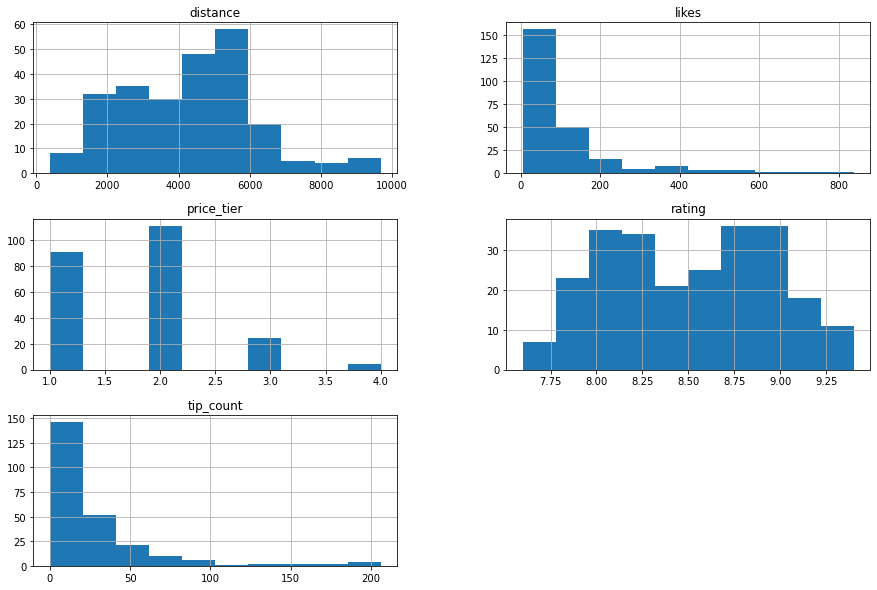

In [15]:
hist = food_df.hist(column=['distance', 'likes', 'price_tier', 'rating', 'tip_count'],bins=10, figsize=(15,10))

The rows which have a null value in the price_tier column is dropped.

In [16]:
food_df_2 = food_df.dropna(subset=['price_tier'])
food_df_2.reset_index(inplace=True)
food_df_2.tail(5)

,index,venue_id,name,lat,lng,address,distance,cc,city,state,...,category,tip_count,likes,rating,price_tier,reservations,diningOptions,payments,outdoorSeating,serves
225,241,4ba8a773f964a520dce439e3,Pizzeria Lugano,59.283559,17.970690,Fredrika Bremers gata 63,6515,SE,Stockholm,Storstockholm,...,Pizza Place,5.0,11.0,7.7,1.0,No,No Delivery,Credit Cards: Yes,Yes,NaN
226,242,4be5bd6fcf200f474ca6133c,Bockholmen Hav & Restaurang,59.377492,18.054378,BockholmenvÃ¤gen 1,9484,SE,Stockholm,Storstockholm,...,Scandinavian Restaurant,14.0,76.0,8.5,2.0,Yes,No Delivery,Credit Cards: Yes,Yes,"Brunch, Lunch, Dinner,"
227,243,4c0a3ceb009a0f478904e9bf,LÃ¥ngÃ¤ngens GÃ¥rd,59.357149,18.193650,LÃ…NGÃ„NGENS GÃ…RD 181 41,9439,SE,LidingÃ¶,Storstockholm,...,CafÃ©,6.0,29.0,8.5,1.0,No,No Delivery,Credit Cards: Yes,Yes,NaN
228,244,59d254536adbf568b63c9f32,Nockeby Bageri,59.328910,17.927926,LÃ…NGÃ„NGENS GÃ…RD 181 41,9678,SE,Stockholm,Storstockholm,...,Bakery,1.0,7.0,8.3,1.0,NaN,NaN,NaN,NaN,NaN
229,245,4be69a77910020a1d075d414,Daisy's,59.340587,17.961140,UlvsundavÃ¤gen 71,8703,SE,Stockholm,Storstockholm,...,Fast Food Restaurant,3.0,15.0,7.9,1.0,NaN,NaN,Credit Cards: Yes,NaN,"Brunch, Lunch, Dinner,"


Then we take a look again if the necessary columns(likes, rating, price_tier) all any null values.

It is important to note that the *likes* column still has 2 rows that has null value.

In [17]:
food_df_2.isna().sum()

index              0
venue_id           0
name               0
lat                0
lng                0
address            0
distance           0
cc                 0
city               0
state              0
country            0
category           0
tip_count          0
likes              2
rating             0
price_tier         0
reservations      56
diningOptions     57
payments          30
outdoorSeating    34
serves            28
dtype: int64

The rows that has null values on the likes column is going to be replaced by a 0.

In [18]:
food_df_2['likes'] = food_df_2['likes'].replace(np.nan, 0)

c:\users\user\anaconda3\envs\battle\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


We then visualize the food dataset on the map.

In [19]:
ericson_globe = [59.2936, 18.0836]
map_stockholm = folium.Map(location=ericson_globe, zoom_start=11)
folium.Marker(ericson_globe, popup='Ericsson Globe').add_to(map_stockholm)
folium.Circle(ericson_globe, radius=10000, color='red', fill=False).add_to(map_stockholm)
for lat, lon in zip(food_df_2['lat'], food_df_2['lng']):
    #folium.CircleMarker([lat, lon], radius=2, color='blue', fill=True, fill_color='blue', fill_opacity=1).add_to(map_berlin) 
    folium.CircleMarker([lat, lon], radius=5, color='blue', fill=True).add_to(map_stockholm)
    #folium.Marker([lat, lon]).add_to(map_berlin)
map_stockholm

### 2.4 Processing and Exploring Pub Data

We then explore the 3rd dataset: Pubs. Again the 3 columns('Unnamed: 0', 'Unnamed: 0.1', 'postal_code') is dropped.

In [20]:
pub_df = pub_df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'postal_code'])
pub_df.head()

,venue_id,name,lat,lng,address,distance,cc,city,state,country,category,tip_count,likes,rating,price_tier,reservations,diningOptions,payments,outdoorSeating,serves
0,4c49b0669f2ad13ae72ba353,Oliver Twist,59.318282,18.070002,Repslagargatan 6,2854,SE,Stockholm,Storstockholm,Sverige,Pub,92.0,267.0,8.5,1.0,Yes,NaN,Credit Cards: Yes,Yes,"Brunch, Lunch, Dinner,"
1,4adcdaebf964a520ae5921e3,WirstrÃ¶ms Pub,59.324897,18.068192,Stora Nygatan 13,3592,SE,Stockholm,Storstockholm,Sverige,Pub,59.0,194.0,8.5,2.0,Yes,No Delivery,Credit Cards: Yes,Yes,"Lunch, Dinner, Dessert,"
2,4adcdaebf964a520cf5921e3,Akkurat,59.319809,18.068830,Hornsgatan 18,3035,SE,Stockholm,Storstockholm,Sverige,Pub,185.0,580.0,9.0,2.0,Yes,Delivery,Credit Cards: Yes (incl. American Express),Yes,Dinner
3,4adcdaecf964a520175a21e3,Soldaten Å vejk,59.314420,18.076377,Ã–stgÃ¶tagatan 35,2353,SE,Stockholm,Storstockholm,Sverige,Pub,53.0,186.0,9.0,NaN,No,"Bar Service, Delivery,",Credit Cards: Yes (incl. American Express),Yes,"Dinner, Dessert, Happy Hour,"
4,4b194789f964a52064da23e3,The Bishops Arms,59.320126,18.064732,Bellmansgatan 12,3141,SE,Stockholm,Storstockholm,Sverige,Pub,34.0,92.0,8.1,1.0,Yes,NaN,Credit Cards: Yes (incl. Visa & MasterCard),Yes,Dinner


We invoked the describe method to check the dataset. It is found out that rating and price_tier has missing values.

In [21]:
pub_df.describe()

,lat,lng,distance,tip_count,likes,rating,price_tier
count,129.000000,129.000000,129.000000,129.000000,129.000000,114.000000,116.000000
mean,59.324227,18.058324,4119.372093,18.255814,54.976744,6.752632,1.456897
std,0.018044,0.028882,1847.774878,27.234307,85.062703,1.163928,0.664533
min,59.254052,17.940353,128.000000,0.000000,0.000000,4.800000,1.000000
25%,59.314833,18.051737,2830.000000,4.000000,6.000000,5.700000,1.000000
50%,59.324019,18.065704,4102.000000,9.000000,22.000000,6.750000,1.000000
75%,59.337917,18.074214,5199.000000,20.000000,69.000000,7.575000,2.000000
max,59.366413,18.131286,9948.000000,185.000000,580.000000,9.000000,4.000000


The histograms show that pubs are on the cheaper side with majority of the venues having a *price_tier* of 1. The *rating* goes as low as <5 and somewhat evenly distributed. Most pubs have a *distance* of 2000-6000 meters. The *likes* is somewhat similar to the food and hotel where majority has a value of <100.

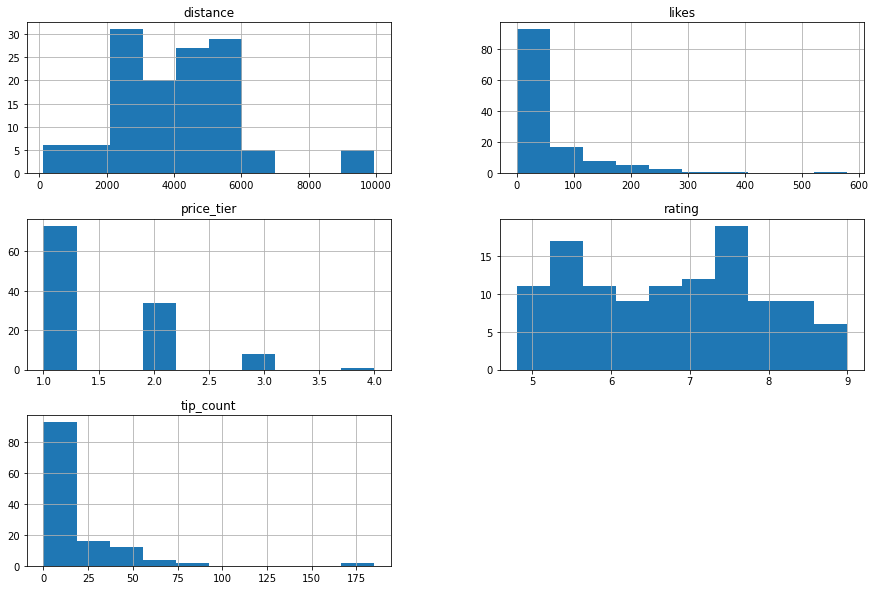

In [22]:
hist = pub_df.hist(column=['distance', 'likes', 'price_tier', 'rating', 'tip_count'],bins=10, figsize=(15,10))

We then drop the rows that has null values in both the rating and price_tier columns.

In [23]:
pub_df_2 = pub_df.dropna(subset=['rating', 'price_tier'])
pub_df_2.reset_index(inplace=True)
pub_df_2.isna().sum()

index              0
venue_id           0
name               0
lat                0
lng                0
address            0
distance           0
cc                 0
city               0
state              0
country            0
category           0
tip_count          0
likes              0
rating             0
price_tier         0
reservations      42
diningOptions     61
payments          14
outdoorSeating    11
serves            20
dtype: int64

Lastly for data exploration, we visualize the pub data on the map.

In [24]:
ericson_globe = [59.2936, 18.0836]
map_stockholm = folium.Map(location=ericson_globe, zoom_start=11)
folium.Marker(ericson_globe, popup='Ericsson Globe').add_to(map_stockholm)
folium.Circle(ericson_globe, radius=10000, color='red', fill=False).add_to(map_stockholm)
for lat, lon in zip(pub_df_2['lat'], pub_df_2['lng']):
    #folium.CircleMarker([lat, lon], radius=2, color='blue', fill=True, fill_color='blue', fill_opacity=1).add_to(map_berlin) 
    folium.CircleMarker([lat, lon], radius=5, color='blue', fill=True).add_to(map_stockholm)
    #folium.Marker([lat, lon]).add_to(map_berlin)
map_stockholm

***

## 3. Methodology <a name="methodology"></a>

In this project we would try to determine on which areas would be a good choice to stay in for the tourist/spectator. The methodology would be accounting all the hotel, food, and pub venues that are around 10 km of the Ericsson Globe.

In the **first step**, we have collected all the data necessary for the hotel, food and pub venues that are located around the Ericsson Globe. We have made sure to include important parameters such as the **geographic coordinates(latitude, longitude)**, **distance** from the Ericsson Globe(in meters), the **rating** of the venue, the number of **likes**, and the **price tier**.

In the **second step**, we would like to understand the **density** of the respective venue category around Stockholm. We would be first using heatmaps to get a good view on the density and then cluster the venues according to their geographic coordinates to be able to show interesting clustering. We would then try to find patterns in the density and clustering of the venues and try to correlate these clusters to every other venue category. 

Then in the **third step**, we would now try to understand the grouping of the venues depending on the parameters: **likes, rating, price, and distance**.

**Lastly,** using both the density and parameter groupings, we would give recommendations on which places the tourist can generally stay. We would try to give recommendations for tourist that wants the highest quality hotel, food, and pub. Recommendations based on distance to the tournament venue(Ericson Globe). And recommendations depending on their budget.

## 4. Analysis <a name="analysis"></a>

### 4.1 Geographic Location Clustering and Analysis <a name="geo_analysis"></a>

This step involves grouping the data according to the geographic location. It would involve to first show the heatmap and then find how the K-Means algorithm cluster the venues that would differentiate between regions. This step would try to know where and how dense a region and cluster is.

First would be importing the clustering algorithm:

In [25]:
from sklearn.cluster import KMeans

The code below is used to be able to visualize the heatmap and the cluster map.

In [26]:
import matplotlib.cm as cm
import matplotlib.colors as colors
from folium import plugins
from folium.plugins import HeatMap


def create_geo_heatmap(geo_frame):
    map_stock = folium.Map(location=ericson_globe, zoom_start=12)
    folium.TileLayer('cartodbpositron').add_to(map_stock) #cartodbpositron cartodbdark_matter
    HeatMap(geo_frame).add_to(map_stock)
    folium.Marker(ericson_globe).add_to(map_stock)
    folium.Circle(ericson_globe, radius=2000, fill=False, color='white').add_to(map_stock)
    folium.Circle(ericson_globe, radius=5000, fill=False, color='white').add_to(map_stock)
    folium.Circle(ericson_globe, radius=8000, fill=False, color='white').add_to(map_stock)
    return map_stock

def create_geo_cluster_map(geo_frame, main_df, cluster_centers, num_clusters):
    map_stock = folium.Map(location=ericson_globe, zoom_start=12)
    folium.TileLayer('cartodbpositron').add_to(map_stock) #cartodbpositron cartodbdark_matter
    HeatMap(geo_frame,min_opacity=0.18).add_to(map_stock)
    folium.Marker(ericson_globe).add_to(map_stock)

    # set color scheme for the clusters
    x = np.arange(num_clusters)
    ys = [i + x + (i*x)**2 for i in range(num_clusters)]
    colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
    rainbow = [colors.rgb2hex(i) for i in colors_array]

    # add markers to the map
    markers_colors = []
    for lat, lon, cluster in zip(main_df['lat'], main_df['lng'], main_df['Geo Clusters']):
        folium.CircleMarker(
            [lat, lon],
            radius=5,
            color=rainbow[cluster-1],
            popup=cluster,
            fill=True,
            fill_color=rainbow[cluster-1],
            fill_opacity=0.7).add_to(map_stock)

    for lat, lon in kmeans.cluster_centers_:
        folium.Marker([lat,lon], icon=folium.Icon(color='darkgreen', icon='bell', prefix='fa')).add_to(map_stock)
        
    return map_stock

#### 4.1.1 Hotel Data <a name="hotel_analysis_1"></a>

First up is the hotel data. First we would just extract the latitude and longitude from the hotel dataframe.

In [27]:
hotel_geo = hotel_df_2[['lat', 'lng']]
hotel_geo.head()

,lat,lng
0,59.302881,18.087713
1,59.318167,18.063311
2,59.314703,18.109398
3,59.324751,18.087659
4,59.329364,18.075392


Having the geographic locations, we then create the heatmap.

In the heatmap we could observe that the 'hot' area is at the north of the Ericsson Globe which is mostly within 2-8km. The rest of the map just contains patches of the venues.

In [28]:
map_stock = create_geo_heatmap(hotel_geo)
map_stock

Now, we cluster them using the KMeans algorithm. We clustered the data in 12 clusters.

In [29]:
number_of_clusters = 12

good_xys = hotel_geo.values
kmeans = KMeans(n_clusters=number_of_clusters, random_state=0).fit(good_xys)

hotel_df_2['Geo Clusters'] = kmeans.labels_

c:\users\user\anaconda3\envs\battle\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


As we visualize the clusters, an ovservation can be noted that most of the clusters that has numerous nodes are located north of the Globe. The rest of the clusters are scattered around that only has a few numbers.

In [30]:
map_stock = create_geo_cluster_map(hotel_geo, hotel_df_2, kmeans.cluster_centers_, number_of_clusters)
map_stock

#### 4.1.2 Food Data <a name="food_analysis_1"></a>

Next up is the food data. Same thing, we extract the latitude and longitude values in order to create the clusters and heatmap.

In [31]:
food_geo = food_df_2[['lat', 'lng']]
food_geo.head()

,lat,lng
0,59.288972,18.063301
1,59.308876,18.081884
2,59.294291,18.109586
3,59.285033,18.087573
4,59.296702,18.051829


We then visualize the food data. Surprisingly, it also appears to be 'hot' in the area that is north of the Ericsson Globe.

In [32]:
map_stock = create_geo_heatmap(food_geo)
map_stock

We now cluster the food data with 15 clusters.

In [33]:
number_of_clusters = 15

good_xys = food_geo.values
kmeans = KMeans(n_clusters=number_of_clusters, random_state=0).fit(good_xys)

food_df_2['Geo Clusters'] = kmeans.labels_

c:\users\user\anaconda3\envs\battle\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Now we visualize the clusters. The most numerous clusters are usually located in the north of Globe.

In [34]:
map_stock = create_geo_cluster_map(food_geo, food_df_2, kmeans.cluster_centers_, number_of_clusters)
map_stock

#### 4.1.3 Pub Data <a name="pub_analysis_1"></a>

For the last of the geographic density analysis, we would now analyze the pub data.

In [35]:
pub_geo = pub_df_2[['lat', 'lng']]
pub_geo.head()

,lat,lng
0,59.318282,18.070002
1,59.324897,18.068192
2,59.319809,18.068830
3,59.320126,18.064732
4,59.316961,18.063949


Similarly, in the heatmap, the pub data is the same in the hotel and food data in which the 'hot' areas are located north of the Ericsson Globe.

In [36]:
map_stock = create_geo_heatmap(pub_geo)
map_stock

We now cluster the pub data into 10 clusters.

In [37]:
number_of_clusters = 10

good_xys = pub_geo.values
kmeans = KMeans(n_clusters=number_of_clusters, random_state=0).fit(good_xys)

pub_df_2['Geo Clusters'] = kmeans.labels_

c:\users\user\anaconda3\envs\battle\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


We now visualize the pub clusters.

In [38]:
map_stock = create_geo_cluster_map(pub_geo, pub_df_2, kmeans.cluster_centers_, number_of_clusters)
map_stock

#### 4.1.4 Density Analysis <a name="density_analysis"></a>

We now have evidence in all three venue types that the most dense area in located north of the Ericsson Globe. We would now determine what is the percentage of the venues does this dense region represent. First we would identify which clusters are located in this region. Then we would try to determine how many venues are in this clusters and then compare it to the total amount of venues that is within 10km of the Ericsson Globe.

In [39]:
hotel_main_region = [1, 2, 6, 10, 11]
food_main_region = [0, 7, 9, 10, 13]
pub_main_region = [0, 1, 4, 5, 9]

def append_all_dense_region(dataframe, cluster_list, category):
    temp_geo_df = pd.DataFrame(columns=['lat', 'lng', 'Geo Clusters'])
    
    for clus in cluster_list:
        series = dataframe['Geo Clusters'] == clus
        df_clus = dataframe[series]
        temp_geo_df = temp_geo_df.append(df_clus[['lat', 'lng', 'Geo Clusters']])
    
    temp_geo_df['category'] = category
    return temp_geo_df

dense_region_geo = pd.DataFrame(columns=['lat', 'lng', 'Geo Clusters'])

hotel_region_df = append_all_dense_region(hotel_df_2, hotel_main_region, 'hotel')
food_region_df = append_all_dense_region(food_df_2, food_main_region, 'food')
pub_region_df = append_all_dense_region(pub_df_2, pub_main_region, 'pub')

print('Hotels')
print(hotel_region_df.groupby('Geo Clusters').count())
print('Total: {}'.format(hotel_region_df['lat'].count()))
print('-----------')
print('Food Venues')
print(food_region_df.groupby('Geo Clusters').count())
print('Total: {}'.format(food_region_df['lat'].count()))
print('-----------')
print('Pubs')
print(pub_region_df.groupby('Geo Clusters').count())
print('Total: {}'.format(pub_region_df['lat'].count()))

dense_region_geo = dense_region_geo.append(hotel_region_df)
dense_region_geo = dense_region_geo.append(food_region_df)
dense_region_geo = dense_region_geo.append(pub_region_df)

print('')
dense_region_nodes = dense_region_geo['lat'].count()
print('Total nodes in the dense region: {}'.format(dense_region_nodes))
Total_nodes = hotel_df_2['lat'].count() + food_df_2['lat'].count() + pub_df_2['lat'].count()
print('Total venues within 10km of Ericsson Globe: {}'.format(Total_nodes))
percentage = (dense_region_nodes/Total_nodes) * 100
print('Percentage of the Main region: {:.2f}%'.format(percentage))

Hotels
              lat  lng  category
Geo Clusters                    
1              14   14        14
2              30   30        30
6              52   52        52
10             23   23        23
11              8    8         8
Total: 127
-----------
Food Venues
              lat  lng  category
Geo Clusters                    
0              42   42        42
7              26   26        26
9              30   30        30
10             31   31        31
13             31   31        31
Total: 160
-----------
Pubs
              lat  lng  category
Geo Clusters                    
0              18   18        18
1              13   13        13
4              13   13        13
5              28   28        28
9              17   17        17
Total: 89

Total nodes in the dense region: 376
Total venues within 10km of Ericsson Globe: 488
Percentage of the Main region: 77.05%


This region which we would now call as the "dense region" has a total of *376* venues which represent **77.05%** of the total venues. In this region there are *127 Hotels, 160 Food venues, and 89 pubs*.

Now that we have identified a region that is the most dense within 10km of Ericsson Globe, we are now going to get the central coordinates of that region by getting the mean of all the coordinates.

The dense region is also visualized.

In [40]:
lat, lng, clus = dense_region_geo.mean()

dense_region_coords = [lat, lng]

print('Coordinates of the Center of the Dense Region: {}'.format(dense_region_coords))

map_stock = folium.Map(location=ericson_globe, zoom_start=12)
folium.TileLayer('cartodbpositron').add_to(map_stock) #cartodbpositron cartodbdark_matter
folium.Marker([lat, lng]).add_to(map_stock)
folium.Marker(ericson_globe).add_to(map_stock)

for lat, lng in zip(dense_region_geo['lat'], dense_region_geo['lng']):
    folium.CircleMarker(
            [lat, lng],
            radius=5,
            color='green',
            fill=True,
            fill_color='green',
            fill_opacity=0.5).add_to(map_stock)


map_stock

Coordinates of the Center of the Dense Region: [59.330048881331344, 18.063149202393614]


#### 4.1.5 The 4 Districts: Norrmalm, Östermalm, Södermalm, Kungsholmen <a name="four_districts"></a>

The most dense region are located in 4 districts namely: Norrmalm, Ostermalm, Sodermalm, and Kungsholmen. Below are descriptions for the districts coming from some travel guides.

**Normrmalm**:

According to wikitravel.org, the district is well served by public transport. Most venues can also be reached by walking. The Stockholm central station is also located in this district along with the Cityterminalen (the bus terminal) and T-Centralen (the subway terminal).[6]

visitstockholm.com[7]:
>The City Center is the place for affordable shopping, especially for the young and trendy. Drottninggatan and the area between Sergels Torg and Kungsträdgården offer a mix of clothing chains and large-scale classic Stockholm department stores. Åhléns City, where Drottninggatan ends at Sergels Torg, is a popular department store with most of the best Swedish brands.

>There are several large chain stores in the nearby area and at Gallerian on Hamngatan, shopaholics can get their fill of various clothing chains and then stop for a bite at one of the many restaurants and cafés. NK (Nordiska kompaniet), on Hamngatan, is a national institution when it comes to fashion and design, and the nearby MOOD Stockholm is a new mall with shopping, food, and service.

>For a break from the hustle and bustle of the city center, you´ll find that Kungsträdgården is perfect for ice cream and people-watching; during spring thousands of pink cherry blossoms light up the park and when winter comes, the ice-skating rink is a very popular spot for both visitors and locals alike. Don’t miss the newly refurbished Hötorgshallen food hall and the colorful market on the adjacent square. And if you're up for a good movie Norrmalm has quite a few movie theaters to choose from!

**Östermalm**:

visitstockholm.com[8]:
>Östermalm makes for an interesting contradiction. It’s a posh residential neighborhood. But it also has the highest concentration of nightclubs in the city, found around Stureplan.

>Bibliotekstan is the city’s most affluent shopping district, with exclusive Scandinavian and international brands. A slow saunter between the food stalls in the Östermalmshallen market hall is also mandatory.

>Take a walk along Strandvägen, and enjoy the magnificent buildings and wonderful seaside views.

**Södermalm**:

visitstockholm.com[9]:
>Södermalm is, after all, more than just trendy shops and cozy cafés. It's also an area with diverse architecture, popular city parks and great stories to tell.

**Kungsholmen**:

visitstockholm.com[10]:
>Kungsholmen is primarily a residential island, where you'll have a great opportunity to mix with the locals. Lots of lively restaurants, bars, and cafés are found here, especially along Hantverkargatan and Fleminggatan. Kungsholmen is home to the most prominent building of the Stockholm skyline, the City Hall. If you get the chance, don’t miss climbing the tower to be amazed by the incredible view.

>The walk along the tree-lined quay on Norrmälarstrand offers unparalleled views of Södermalm and boats sailing on the lake. If you continue past the City Hall you can actually stroll around the whole island along the water. It's a popular track for locals and is often either finished or started with a brunch in one of the many cafés in the area.

>During summer, there are a couple of nice places to go for a swim on the island, for instance in the big green area of Rålambshovsparken. For a truly exotic experience, we recommend a swim from the rocks of Fredhällsbadet.

#### 4.1.6 Generating the distance between the venues and the "Dense Region Center" <a name="distance_analysis"></a>

The code below is used in order to determine the distance between two coordinates.

In [41]:
from math import sin, cos, sqrt, atan2, radians


def get_distance(lat_1, lng_1, lat_2, lng_2):

    R = 6373.0

    lat1 = radians(lat_1)
    lon1 = radians(lng_1)
    lat2 = radians(lat_2)
    lon2 = radians(lng_2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    
    return distance

We first determine the average distance from the dense region to the Ericsson Globe.

In [42]:
distance_dense_to_globe = get_distance(dense_region_coords[0], dense_region_coords[1], ericson_globe[0], ericson_globe[1])
print('Distance from the center of the most dense region to the Ericsson Globe: {:.2f} km'.format(distance_dense_to_globe))

Distance from the center of the most dense region to the Ericsson Globe: 4.22 km


By drawing a straight line between the center of the dense region to the Ericsson Globe, the line covers **4.22km**. Google maps determined that the center of the dense region corresponds to this address: **Klaratunneln, 111 52 Stockholm, Sweden**

Using google maps in determining the travel time between the two points using public transportation, it was able to calculate that it takes **22mins** from Klaratunneln, 111 52 Stockholm, Sweden to the Ericsson Globe. Travelling through car is faster though.

Here is the map:

![Dense_to_Globe](https://raw.githubusercontent.com/sphinxkid/Coursera_Capstone/master/travel_img.JPG)

In this step, we would now determine the distance from the dense center [59.33004888133137, 18.063149202393596] to each of the respective venues.

In [43]:
def get_distance_whole_dataframe(dataframe):
    dist_list = []
    for lat, lon in zip(dataframe['lat'], dataframe['lng']):
        dist_list.append(get_distance(dense_region_coords[0], dense_region_coords[1], lat, lon))
    return dist_list

In [44]:
dist_list = get_distance_whole_dataframe(hotel_df_2)
hotel_df_2['dist_to_dense_region'] = dist_list
dist_list = get_distance_whole_dataframe(food_df_2)
food_df_2['dist_to_dense_region'] = dist_list
dist_list = get_distance_whole_dataframe(pub_df_2)
pub_df_2['dist_to_dense_region'] = dist_list

c:\users\user\anaconda3\envs\battle\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\user\anaconda3\envs\battle\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
c:\users\user\anaconda3\envs\battle\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

### 4.2 Clustering Based on Ratings, Likes, Price, Distance to the Dense Region <a name="param_clustering"></a>

We now have the data for clustering it based on other parameters aside from geographic location. We would be moving on next to try and cluster the data using other attributes of the venues, namely: **ratings, likes, price** and the newly acquired **distance from [ 59.33004888133137, 18.063149202393596 ]**.

Below is a declaration of a function that is going to be used in order to visualize the new clustering.

In [45]:
from folium.plugins import FloatImage
image_file = 'clust_legend.PNG'

def visualize_cluster_dense(dataframe, num_clusters):
    map_stock = folium.Map(location=dense_region_coords, zoom_start=12)
    folium.TileLayer('cartodbpositron').add_to(map_stock) #cartodbpositron cartodbdark_matter
    folium.Marker(dense_region_coords).add_to(map_stock)

    # set color scheme for the clusters
    x = np.arange(num_clusters)
    ys = [i + x + (i*x)**2 for i in range(num_clusters)]
    colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
    rainbow = [colors.rgb2hex(i) for i in colors_array]

    # add markers to the map
    markers_colors = []
    for lat, lon, cluster, likes in zip(dataframe['lat'], dataframe['lng'], dataframe['cluster_rel_to_dense'], dataframe['likes']):
        folium.CircleMarker(
            [lat, lon],
            radius=5,
            color=rainbow[cluster-1],
            popup='{}, {}'.format(cluster, likes),
            fill=True,
            fill_color=rainbow[cluster-1],
            fill_opacity=0.7).add_to(map_stock)

    FloatImage(image_file, bottom=70, left=7).add_to(map_stock)
    
    return map_stock

First up is the clustering of the hotel data.

#### 4.2.1 Hotels <a name="hotel_analysis_2"></a>

We need to to first get all the needed attributes. However, with the primary data exploration of the hotel data, it is found out that the price_tier column is severly missing its values. So for the hotel data, the price_tier column would be excluded.

In [46]:
hotel_clus_df = hotel_df_2[['likes', 'rating', 'dist_to_dense_region']]
hotel_clus_df.head(5)

,likes,rating,dist_to_dense_region
0,125.0,8.3,3.328016
1,165.0,8.8,1.321706
2,87.0,8.7,3.130848
3,123.0,8.7,1.510422
4,335.0,8.7,0.698786


We would now apply standardization of the data through the standard scalar algorithm.

In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
hotel_data_scaled = scaler.fit_transform(hotel_clus_df)

We would now cluster the data using the KMeans algorithm. It was found out that clustering the data into 5 clusters is sufficient enough to group the data.

In [48]:
number_of_clusters = 5

kmeans = KMeans(n_clusters=number_of_clusters, random_state=0).fit(hotel_data_scaled)

hotel_clus_df['cluster_rel_to_dense'] = kmeans.labels_
hotel_df_2['cluster_rel_to_dense'] = kmeans.labels_

c:\users\user\anaconda3\envs\battle\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
c:\users\user\anaconda3\envs\battle\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Here, it is shown how many members each cluster have.

In [49]:
hotel_clus_df.groupby('cluster_rel_to_dense')['likes'].count()

cluster_rel_to_dense
0    52
1     5
2    54
3    21
4    24
Name: likes, dtype: int64

Below is shown the characteristics of the clusters. The table is able to show some clusters that have incredible characteristics.

**Cluster 1 [Most attractive hotels]**:

The cluster shows that it has the highest average likes and rating while at the same time having the closest average distance to the dense region center. With these characteristics it could be assumed that these cluster represents the best venues. However, the number of venues in this cluster is only 5.

**Cluster 4 [Least attractive hotels]**:

The cluster is the opposite of cluster 1. Low end of likes and rating while having the highest distance to the dense center. These venues might possibly be the least attractive venues for tourist of the International 10.

**Cluster 3 [Amazing Hotels with good characteristics]**:

The cluster shows that is the 2nd best cluster in terms of its attributes. High likes and rating but only second to cluster 1. It also an average distance of 1km making the venues really attractive.

**Cluster 0 [Decent Hotels]**:

The cluster has good likes and above average ratings and the distance is really good too. It is above average in the least. The cluster has the 2nd highest venues at 52.

**Cluster 2 [Average Hotels]**:

It has a number of likes while having an average rating. It has acceptable characteristics but might not be a primary choice for venues. The cluster is the most numerous at 54.

In [50]:
hotel_clus_df.groupby('cluster_rel_to_dense').mean()

,likes,rating,dist_to_dense_region
cluster_rel_to_dense,,,
0,37.634615,7.598077,1.357068
1,314.200000,8.180000,0.539206
2,19.981481,5.798148,1.345565
3,154.285714,8.100000,1.092164
4,22.333333,6.645833,5.555754


Below is the visualization of the cluster in the map.

In [51]:
map_stock = visualize_cluster_dense(hotel_df_2, number_of_clusters)
map_stock

#### 4.2.2 Food Venues <a name="food_analysis_2"></a>

Now we would cluster the food venues. This time the data has really good data on price tier so it would be included in the clustering.

In [52]:
food_clus_df = food_df_2[['likes', 'rating', 'price_tier', 'dist_to_dense_region']]
food_clus_df.head()

,likes,rating,price_tier,dist_to_dense_region
0,57.0,9.1,1.0,4.568968
1,205.0,9.3,1.0,2.583967
2,32.0,8.9,1.0,4.771589
3,22.0,8.6,2.0,5.195581
4,43.0,8.9,2.0,3.764395


The data has undergone standardization.

In [53]:
food_data_scaled = scaler.fit_transform(food_clus_df)

We would now cluster the data into 5 clusters.

In [54]:
number_of_clusters = 5

kmeans = KMeans(n_clusters=number_of_clusters, random_state=0).fit(food_data_scaled)

food_clus_df['cluster_rel_to_dense'] = kmeans.labels_
food_df_2['cluster_rel_to_dense'] = kmeans.labels_

c:\users\user\anaconda3\envs\battle\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
c:\users\user\anaconda3\envs\battle\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Here below, we show the distribution of the food clusters.

In [55]:
food_clus_df.groupby('cluster_rel_to_dense')['likes'].count()

cluster_rel_to_dense
0    82
1    35
2    19
3    23
4    71
Name: likes, dtype: int64

By getting the mean of the clusters we are now able to see the remarkable characteristics of the clusters in the food data.

**Cluster 2 [Best Food Venues]**:

The cluster has it all. Highest likes, 2nd highest rating, lowest distance to the dense center while maintining a mid price tier. Based on the cluster and data from the foursquare api, these venues should be the best places to eat in.

**Cluster 3 [Amazing Pricey Food]**:

The cluster is very likeable, high rating, close in proximity but it has the highest price tier in all of the clusters. If it is compared to cluster 2, it can be assumed that people liked food venues more that have affordable pricing. If the tourist wants an amazing experience without minding the price, then these venues should provide for their needs.

**Cluster 4 [Amazing Affordable Food]**:

Arguably these cluster is better than cluster 3 because of its characteristics. In comparison to cluster 3 it is very likeable while only having a difference of +8.522351 in likes, highest rating, only having an average distance of ~1.8 km while being really affordable at a price tier of ~1.6. If tourists are looking for an amazing accessible dining experience while being friendly to the wallet, then these venues are the place to go.

**Cluster 0 [Decent Food]**:

The cluster have decent amount of likes while still enjoying a high rating. The price tier is also at the low end and an average distance of 2 km ain't that bad.

**Cluster 1 [Decent Cheap Food but requires more travel]**:

If the tourists are looking for cheap good food and wants to travel further than the dense region, then these venues would meet their expectations.

---------------------------------------------
*Side Note*: All the food venues are rated really highly which means that based on foursquare data, the food that is being offered in Stockholm is deemed to be highly desirable.

In [56]:
food_clus_df.groupby('cluster_rel_to_dense').mean()

,likes,rating,price_tier,dist_to_dense_region
cluster_rel_to_dense,,,,
0,50.243902,8.102439,1.536585,2.038127
1,38.000000,8.497143,1.314286,6.083909
2,481.315789,8.800000,2.105263,1.436900
3,104.043478,8.552174,3.173913,1.791393
4,95.521127,8.849296,1.633803,1.827704


Below is the visualization of the food clusters.

In [57]:
map_stock = visualize_cluster_dense(food_df_2, number_of_clusters)
map_stock

#### 4.2.3 Pubs <a name="pub_analysis_2"></a>

We would now cluster the pub data with the likes, rating, price_tier, and dist_to_dense_region attributes.

In [58]:
pub_clus_df = pub_df_2[['likes', 'rating', 'price_tier', 'dist_to_dense_region']]
pub_clus_df.head()

,likes,rating,price_tier,dist_to_dense_region
0,267.0,8.5,1.0,1.365382
1,194.0,8.5,2.0,0.640483
2,580.0,9.0,2.0,1.183720
3,92.0,8.1,1.0,1.107400
4,30.0,8.4,1.0,1.456490


We would also standardize the pub data like what we did in hotel and food.

In [59]:
pub_data_scaled = scaler.fit_transform(pub_clus_df)

The pub data is going to be clustered into 5 groups.

In [60]:
number_of_clusters = 5

kmeans = KMeans(n_clusters=number_of_clusters, random_state=0).fit(pub_data_scaled)

pub_clus_df['cluster_rel_to_dense'] = kmeans.labels_
pub_df_2['cluster_rel_to_dense'] = kmeans.labels_

c:\users\user\anaconda3\envs\battle\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
c:\users\user\anaconda3\envs\battle\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Below is the distribution of the clusters:

In [61]:
pub_clus_df.groupby('cluster_rel_to_dense')['likes'].count()

cluster_rel_to_dense
0    38
1     4
2    34
3    15
4    11
Name: likes, dtype: int64

Now lets examine the pub clusters:

**Cluster 1 [Best Affordable Pubs]**:

The cluster has the best likes and ratings while maintaining a price tier of <2.0. It is also close to the dense region center.

**Cluster 3 [Pricey Good Pubs]**:

It has high amount of likes and highly rated. It is also the cluster that is closest to the dense region center but the downside is that it represent the most expensive venues.

**Cluster 2 [Cheap Good Pubs]**:

Lowest price tier with decent amount of likes and maintaining a high rating of > 7.0. It also in close proximity to the dense region center. If the tourist is looking for a cheap yet decent pub, then these venues would be able to fit the bill.

**Cluster 0 [Average Pubs]**:

It has the lower end of likes and has the lowest average rating. The redeeming attributes are that the cluster is relatively cheap and somewhat accessible.

**Cluster 4 [Average yet Far Pubs]**:

Lowest amount of likes with a decent rating. It is fairly cheap too but the tourist need to get out of their way to reach the venues.

----------
*Side Note*: The Pubs are generally on the cheaper end of the price tier, so the venues are mostly good for a community night out.

In [62]:
pub_clus_df.groupby('cluster_rel_to_dense').mean()

,likes,rating,price_tier,dist_to_dense_region
cluster_rel_to_dense,,,,
0,14.842105,5.578947,1.394737,1.626495
1,383.000000,8.250000,1.750000,1.411780
2,50.647059,7.397059,1.147059,1.510102
3,136.866667,7.973333,2.600000,1.046439
4,14.363636,6.609091,1.272727,5.368291


Below is the visualization of the pub clusters.

In [63]:
map_stock = visualize_cluster_dense(pub_df_2, number_of_clusters)
map_stock

#### 4.2.4 Aggregate Analysis <a name="agg_analysis"></a>

We first create a visualization function that could show the aggregated clusters from the 3 categories[hotel, food, pub]

In [64]:
from folium.plugins import FloatImage
image_file = 'legend.PNG'

def visualize_aggregate_cluster(hotel_df, h_cluster, food_df, f_cluster, pub_df, p_cluster):
    map_stock = folium.Map(location=dense_region_coords, zoom_start=12)
    folium.TileLayer('cartodbpositron').add_to(map_stock) #cartodbpositron cartodbdark_matter
    folium.Marker(dense_region_coords).add_to(map_stock)
    
    df_1 = get_cluster(hotel_df, h_cluster)
    df_2 = get_cluster(food_df, f_cluster)
    df_3 = get_cluster(pub_df, p_cluster)
    
    place_circles(df_1, map_stock, 'blue', 'hotel')
    place_circles(df_2, map_stock, 'green', 'food')
    place_circles(df_3, map_stock, 'red', 'pub')

    FloatImage(image_file, bottom=80, left=7).add_to(map_stock)

    return map_stock

def visualize_aggregate_cluster_many(hotel_df, h_cluster_1, h_cluster_2, food_df, f_cluster_1, f_cluster_2, pub_df, p_cluster_1, p_cluster_2):
    map_stock = folium.Map(location=dense_region_coords, zoom_start=12)
    folium.TileLayer('cartodbpositron').add_to(map_stock) #cartodbpositron cartodbdark_matter
    folium.Marker(dense_region_coords).add_to(map_stock)
    
    df_1 = get_cluster(hotel_df, h_cluster_1)
    df_2 = get_cluster(food_df, f_cluster_1)
    df_3 = get_cluster(pub_df, p_cluster_1)
    df_4 = get_cluster(hotel_df, h_cluster_2)
    df_5 = get_cluster(food_df, f_cluster_2)
    df_6 = get_cluster(pub_df, p_cluster_2)
    
    
    place_circles(df_1, map_stock, 'blue', 'Hotel')
    place_circles(df_2, map_stock, 'green', 'Food')
    place_circles(df_3, map_stock, 'red', 'Pub')
    place_circles(df_4, map_stock, 'blue', 'Hotel')
    place_circles(df_5, map_stock, 'green', 'Food')
    place_circles(df_6, map_stock, 'red', 'Pub')
    
    FloatImage(image_file, bottom=80, left=7).add_to(map_stock)
    
    return map_stock

def get_cluster(dataframe, cluster):
    return dataframe.loc[dataframe.cluster_rel_to_dense == cluster, ['lat', 'lng', 'name']]

def place_circles(dataframe, map_stock, color, category):
    for lat, lon, name in zip(dataframe['lat'], dataframe['lng'], dataframe['name']):
        folium.CircleMarker(
            [lat, lon],
            radius=5,
            color=color,
            popup='{}: {}'.format(category, name),
            fill=True,
            fill_color=color,
            fill_opacity=0.7).add_to(map_stock)
        
def show_cluster_details(hotel_clus, food_clus, pub_clus):
    print('-----------------------------------------------------------')
    print('Hotel [Cluster {}]'.format(hotel_clus))
    print(hotel_clus_df.groupby('cluster_rel_to_dense').mean().loc[hotel_clus,:])
    print('-----------------------------------------------------------')
    print('Food [Cluster {}]'.format(food_clus))
    print(food_clus_df.groupby('cluster_rel_to_dense').mean().loc[food_clus,:])
    print('-----------------------------------------------------------')
    print('Pub [Cluster {}]'.format(pub_clus))
    print(pub_clus_df.groupby('cluster_rel_to_dense').mean().loc[pub_clus,:])
    print('-----------------------------------------------------------')

 The clustering of the data using the *likes, rating, price_tier, and distance_to_dense_region* attributes produced some *remarkable patterns*. 
 
**A primary assumption is made in the case of hotels. The hotel data doesn't have the price_tier data however its other characteristics exhibits the same patterns of food and pub data. So it is assumed that the hotels would have the same characteristics of price_tier to those of the food and pub data.** 
 
 One of the patterns is how similar the best clusters of the respective categories[hotel, food, pub] are.
 
 **Best Clusters: Hotel [Cluster 1], Food [Cluster 2], Pub [Cluster 1]** 

In [65]:
show_cluster_details(1,2,1)

-----------------------------------------------------------
Hotel [Cluster 1]
likes                   314.200000
rating                    8.180000
dist_to_dense_region      0.539206
Name: 1, dtype: float64
-----------------------------------------------------------
Food [Cluster 2]
likes                   481.315789
rating                    8.800000
price_tier                2.105263
dist_to_dense_region      1.436900
Name: 2, dtype: float64
-----------------------------------------------------------
Pub [Cluster 1]
likes                   383.00000
rating                    8.25000
price_tier                1.75000
dist_to_dense_region      1.41178
Name: 1, dtype: float64
-----------------------------------------------------------


They all have the similar characteristics of **best likes, best rating, affordable price, and close proximity to the dense center**.

They are all located around the dense center as shown below:

In [66]:
map_stock = visualize_aggregate_cluster(hotel_df_2, 1, food_df_2, 2, pub_df_2, 1)
map_stock

As shown above the best venues are located in close proximity of each other and at the same time at the close proximity of the dense region center. They are located mostly in Norrmalm and Södermalm districts.

The next pattern is the:

**Fringe Clusters: Hotel [Cluster 4], Food [Cluster 1], Pub [Cluster 4]**

In [67]:
show_cluster_details(4,1,4)

-----------------------------------------------------------
Hotel [Cluster 4]
likes                   22.333333
rating                   6.645833
dist_to_dense_region     5.555754
Name: 4, dtype: float64
-----------------------------------------------------------
Food [Cluster 1]
likes                   38.000000
rating                   8.497143
price_tier               1.314286
dist_to_dense_region     6.083909
Name: 1, dtype: float64
-----------------------------------------------------------
Pub [Cluster 4]
likes                   14.363636
rating                   6.609091
price_tier               1.272727
dist_to_dense_region     5.368291
Name: 4, dtype: float64
-----------------------------------------------------------


The greatest characteristic that made these cluster **least desireable** is the **distance from the dense region**. The clusters also have **low likes, mostly average to above average rating, but they have cheap pricing**.

The map below will show that they are located outside of the dense region:

In [68]:
map_stock = visualize_aggregate_cluster(hotel_df_2, 4, food_df_2, 1, pub_df_2, 4)
folium.Marker(ericson_globe,  icon=folium.Icon(color='red', icon='bell', prefix='fa')).add_to(map_stock)
folium.Circle(radius=2000, color='black', location=ericson_globe).add_to(map_stock)
map_stock

However, as shown in the map. These clusters have a region in which could probably make it really *desirable* for the International 10 tourist because of its **proximity(within 2 km) of the Ericsson Globe**. It would make the event area really accessible.

Another pattern is with the 2nd best clusters:

**Amazing Clusters: Hotel[Cluster 3], Food[Cluster 3], Pub[Cluster 3]**

In [69]:
show_cluster_details(3,3,3)

-----------------------------------------------------------
Hotel [Cluster 3]
likes                   154.285714
rating                    8.100000
dist_to_dense_region      1.092164
Name: 3, dtype: float64
-----------------------------------------------------------
Food [Cluster 3]
likes                   104.043478
rating                    8.552174
price_tier                3.173913
dist_to_dense_region      1.791393
Name: 3, dtype: float64
-----------------------------------------------------------
Pub [Cluster 3]
likes                   136.866667
rating                    7.973333
price_tier                2.600000
dist_to_dense_region      1.046439
Name: 3, dtype: float64
-----------------------------------------------------------


These venues in these clusters have a glaring characteristic: they are the **most expensive**. They have amazing attributes in likes, rating and distance but they are more costly. These clusters are only 2nd to the best clusters and the difference between these 2 groups is that the *best clusters* have more affordable pricing, mostly in mid range. The fewer amount of likes and rating of the *amazing clusters* could possibly be attributed for having a higher **price tier**.

Below is a map showing the clusters:

In [70]:
map_stock = visualize_aggregate_cluster(hotel_df_2, 3, food_df_2, 3, pub_df_2, 3)
map_stock

The last pattern is the clusters that has the most amount of venues.

**Highest Amount of Venues Clusters: Hotel [Cluster 0 & 2], Food [Cluster 0 & 4], Pub [Cluster 0 & 2]**

In [71]:
show_cluster_details(0,0,0)
show_cluster_details(2,4,2)

-----------------------------------------------------------
Hotel [Cluster 0]
likes                   37.634615
rating                   7.598077
dist_to_dense_region     1.357068
Name: 0, dtype: float64
-----------------------------------------------------------
Food [Cluster 0]
likes                   50.243902
rating                   8.102439
price_tier               1.536585
dist_to_dense_region     2.038127
Name: 0, dtype: float64
-----------------------------------------------------------
Pub [Cluster 0]
likes                   14.842105
rating                   5.578947
price_tier               1.394737
dist_to_dense_region     1.626495
Name: 0, dtype: float64
-----------------------------------------------------------
-----------------------------------------------------------
Hotel [Cluster 2]
likes                   19.981481
rating                   5.798148
dist_to_dense_region     1.345565
Name: 2, dtype: float64
-----------------------------------------------------------

These clusters have low to mid amounts of likes and rating. They also also affordable and close to the dense region center. 

In [72]:
print('Hotel')
print('Cluster 0: {}'.format(hotel_df_2.loc[hotel_df_2.cluster_rel_to_dense == 0, 'likes'].count()))
print('Cluster 2: {}'.format(hotel_df_2.loc[hotel_df_2.cluster_rel_to_dense == 2, 'likes'].count()))
print('-------------------')
print('Food')
print('Cluster 0: {}'.format(food_df_2.loc[food_df_2.cluster_rel_to_dense == 0, 'likes'].count()))
print('Cluster 4: {}'.format(food_df_2.loc[food_df_2.cluster_rel_to_dense == 4, 'likes'].count()))
print('-------------------')
print('Pub')
print('Cluster 0: {}'.format(pub_df_2.loc[pub_df_2.cluster_rel_to_dense == 0, 'likes'].count()))
print('Cluster 2: {}'.format(pub_df_2.loc[pub_df_2.cluster_rel_to_dense == 2, 'likes'].count()))

Hotel
Cluster 0: 52
Cluster 2: 54
-------------------
Food
Cluster 0: 82
Cluster 4: 71
-------------------
Pub
Cluster 0: 38
Cluster 2: 34


Below is the map to show how numerous the members of these clusters are.

In [73]:
map_stock = visualize_aggregate_cluster_many(hotel_df_2, 0,2, food_df_2, 0,4, pub_df_2, 0,2)
map_stock

These clusters are concentrated in the dense region. If the tourist just want decent eats without any much preferences, then these venues can easily be found all over the place in the dense region.

### 4.3 Analysis on the Payment Column <a name="payment_analysis"></a>

And now we would do an auxially analysis on the payment shcemes of these venues to add recommendations for the tourists on how they can carry their money and pay for services.

First, we'll take a look at the payments in the hotel, food, and pub data.

In [74]:
print(hotel_df_2.groupby('payments').index.count())
print('------------------------------------------')
print('Total hotel venues that accepts credit cards: {}'.format(hotel_df_2.groupby('payments').index.count().sum()))
print('Total hotel venues that doesn\'t have data on payment: {}'.format(hotel_df_2['payments'].isna().sum()))

payments
Credit Cards: Yes                                          79
Credit Cards: Yes (incl. American Express & MasterCard)    35
Credit Cards: Yes (incl. American Express)                 22
Credit Cards: Yes (incl. MasterCard)                        1
Credit Cards: Yes (incl. Visa & American Express)           1
Credit Cards: Yes (incl. Visa & MasterCard)                 2
Name: index, dtype: int64
------------------------------------------
Total hotel venues that accepts credit cards: 140
Total hotel venues that doesn't have data on payment: 16


In [75]:
print(food_df_2.groupby('payments').index.count())
print('------------------------------------------')
print('Total food venues that accepts credit cards: {}'.format(food_df_2.groupby('payments').index.count()[1:].sum()))
print('Total food venues that doesn\'t have data on payment: {}'.format(food_df_2['payments'].isna().sum()))
print('Total food venues that only accepts cash: {}'.format(food_df_2.groupby('payments').index.count()[0]))

payments
Credit Cards: No                                             1
Credit Cards: Yes                                          144
Credit Cards: Yes (incl. American Express & MasterCard)     16
Credit Cards: Yes (incl. American Express)                  10
Credit Cards: Yes (incl. MasterCard)                         1
Credit Cards: Yes (incl. NFC Payments & MasterCard)          1
Credit Cards: Yes (incl. Visa & MasterCard)                 23
Credit Cards: Yes (incl. Visa)                               4
Name: index, dtype: int64
------------------------------------------
Total food venues that accepts credit cards: 199
Total food venues that doesn't have data on payment: 30
Total food venues that only accepts cash: 1


In [76]:
print(pub_df_2.groupby('payments').index.count())
print('------------------------------------------')
print('Total pub venues that accepts credit cards: {}'.format(pub_df_2.groupby('payments').index.count()[1:].sum()))
print('Total pub venues that doesn\'t have data on payment: {}'.format(pub_df_2['payments'].isna().sum()))
print('Total food venues that only accepts cash: {}'.format(food_df_2.groupby('payments').index.count()[0]))

payments
Credit Cards: No                                            1
Credit Cards: Yes                                          71
Credit Cards: Yes (incl. American Express & MasterCard)     3
Credit Cards: Yes (incl. American Express)                  8
Credit Cards: Yes (incl. MasterCard & American Express)     1
Credit Cards: Yes (incl. NFC Payments & MasterCard)         1
Credit Cards: Yes (incl. Visa & MasterCard)                 1
Credit Cards: Yes (incl. Visa)                              2
Name: index, dtype: int64
------------------------------------------
Total pub venues that accepts credit cards: 87
Total pub venues that doesn't have data on payment: 14
Total food venues that only accepts cash: 1


**It is now assumed that the venues that doesn't have data on payment, only accepts cash.**

 Below is the percentage of the venues that accept credit cards:

In [77]:
print('Hotels: {:.2f}%'.format((140/156)*100))
print('Foods: {:.2f}%'.format((199/230)*100))
print('Pubs: {:.2f}%'.format((87/102)*100))
print('Total: {:.2f}%'.format(((140+199+87)/(156+230+102))*100))

Hotels: 89.74%
Foods: 86.52%
Pubs: 85.29%
Total: 87.30%


The venues have a high acceptance rate for credit cards of 87.30% which would allow more flexibility in payment options for the tourists.

***

## 5. Results and Discussion <a name="results"></a>

Our endeavor has determined that Stockholm offers decent amount and varied choices of Hotel, Food, and Pub venues for the International 10 attendees. The data was acquired through the Foursquare API and the data pertains to the venues that are within 10km of the Ericsson Globe. After processing the raw data, this effort attained 156 Hotels, 230 Food venues, and 102 Pubs. 

The primary step done was to create a heatmap for each of the venues to identify the hotspots in Stockholm. Upon further observation, it was found out that the hotels, food venues, and pubs are concentrated in a region north of the Ericsson Globe. Clustering based on the geographical coordinates was done in order to identify which venues are comprising this "hot" region above the Ericsson Globe. All the pertaining clusters were visually identified and combined together. The mean of the coordinates of these concerned venues was then calculated. The mean represents the focal point or the center of the "Dense Region." This focal point represents the area that is the most accessible in the region.

The dense region is comprised of 4 districts, namely:  Kungsholmen, Södermalm, Norrmalm and Östermalm. These 4 districts represent the Stockholm City Center. The dense region represents 77.05% of the total venues.

After getting the center point(59.330048881331344, 18.063149202393614), the distances from this point to all the venues are then calculated. It is found out that the distance of the straight line between this point and the Ericsson Globe is 4.22 km. By using google maps, the address(Klaratunneln, 111 52 Stockholm, Sweden) of this point was determined and an estimation of the travel time between this center to the Ericsson Globe was calculated. The time of travel averaged to 22 mins when using public transportation and the travel time ranges from 12 to 17 mins if travelling by car. This new data would help the tourist plan for their commute.

Now that the distances between the center and the venues have been calculated, another set of clustering is going to be performed. These new set of clustering involves parameters such as likes, rating, price tier, and the acquired data of distance to the dense region center. Each category(hotel, food, pub) was clustered seperately. The results of the clusters was able to identify remarkable features and patterns. And these patterns that are present in each of the category have been found out to be similar to each other which prompted an aggregate analysis.

The aggregate analysis that was done have an assumption that was made in which the behaviour of the price tier in the hotel is assumed to be the same as what is found in food and pubs. The assumption was made because the hotels lacked the necessary price tier data.

The results of the aggregate analysis identified 4 major patterns for the data. These characteristics would also serve as recommendations for the tournament attendee. The first pattern pertains to the venues that is demeed to be have the best qualities. It has the highest likes, rating, and close proximity to the center. At the same time, the venues have an affordable pricing, right in the middle. However, take note that these clusters have the fewest number of venues.

The second pattern pertains to the fringe venues that are located at the outer rim of the dense region. They have at least average in likes and rating but they are mostly the cheapest venues. One area needs specific attention though which is the area around the Ericsson Globe. There are venues in this pattern that is in close proximity with the event area. Because of its distance, this venues in this area can be deemed to be a premium location.

The third pattern represents the venues that are amazing but in exchange they are a bit pricey. These venues have high likes and rating. The distance to the center is also really good. However, it represents the most expensive venues. These venues would probably be lower in demand and should be good for tourists that can afford the price.

The last pattern identifies the venues that are about average but accounts for the most in numbers. So if the tourist/attendee just wants a decent place to stay, eat, and drink, there are plenty of venues to choose from. This pattern represents the fact that Stockholm City Center has abundance of venues that the attendees can go.

Lastly, an auxially analysis is made regarding the payment options of the venues. It was found out that 87.3 % of the venues offer credit card payments and some accepts NFC(near-field communication) payments. The venues in Stockholm has a lot of flexibility in terms of payment.

## 6. Conclusion <a name="conclusion"></a>

The aim of the project is to attempt to find travel recommendations for the International 10 attendee. Because the traveller isn't a normal tourist, its needs is also different. The chunk of the stay is going to be used in watching the tournament. So the venues that were considered were Hotel, Food venues, and Pubs. The inclusion of pubs is due to the video game, Dota 2, is community-driven and there have been events called pubstomps. Pubs would be an amazing place for a community gathering. The project has explored, processed and clustered the venue data and was able to come up with a couple of recommendations. One is the general recommendation to find a place in the Stockholm City Center(the 4 districts). The project was also able to give an estimate of the travel time from the city center to the Ericsson Globe which could help the attendee plan their day. The project was also able to give recommendations on which places the traveller can go depending on their preferences.

However, one thing to point out is that the data is from Foursquare API and it has been processed. The data is only a representation of the venues and does not paint the complete picture because it doesn't have the complete list of venues. But the project should be able to give the traveller a good enough picture on Stockholm. The project is not an end-all but rather a supplement that would help the attendee take less time to plan and more time to enjoy their stay.

***

## References <a name="references"></a>

[1] https://en.wikipedia.org/wiki/The_International_(Dota_2)

[2] https://escharts.com/tournaments/dota2/international-2019

[3] https://en.wikipedia.org/wiki/Ericsson_Globe

[4] http://blog.dota2.com/2020/04/the-international-2/

[5] https://www.goldmansachs.com/insights/pages/infographics/e-sports/index.html?cid=sch-pd-bing-esportshub-searchad-201810-----&mkwid=9b1dvEvt

[6] https://wikitravel.org/en/Stockholm/Norrmalm

[7] https://www.visitstockholm.com/guides/citynorrmalm/

[8] https://www.visitstockholm.com/guides/district-guide-ostermalm/

[9] https://www.visitstockholm.com/guides/see-the-sights-of-sodermalm/

[10] https://www.visitstockholm.com/guides/district-guide-kungsholmen/